/tmp/ipykernel_18352/3986405885.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


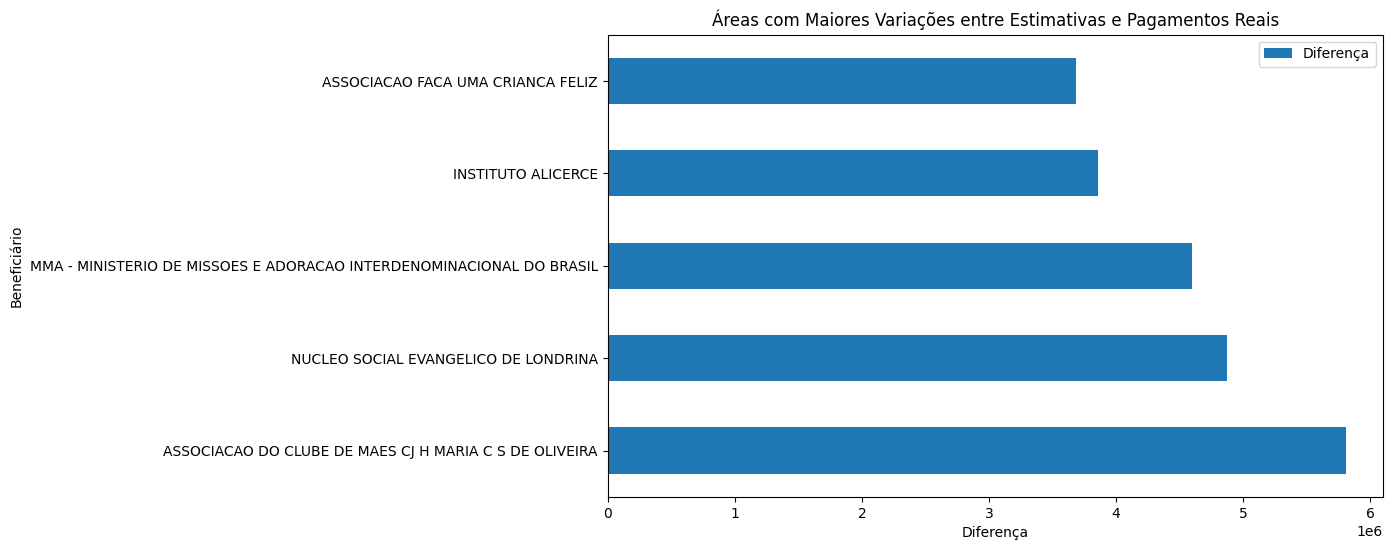

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os arquivos CSV
contratos_est_mun_df = pd.read_csv('ContratosEstMun.csv', encoding='latin1', sep=';')
contrato_pag_df = pd.read_csv('ContratoPag.csv', encoding='latin1', sep=';')

# 1. Conversão de Dados
colunas_monetarias_est_mun = ['Repasse previsto', 'Valor Contrapartida']
colunas_monetarias_contrato = ['Liquidado - Orçamento', 'Estornado - Orçamento', 'Liquidado - Restos a pagar', 'Estornado - Restos a pagar', 'Líquido']

# Remove pontos e substitui vírgulas por ponto, em seguida, converte para float
contratos_est_mun_df[colunas_monetarias_est_mun] = contratos_est_mun_df[colunas_monetarias_est_mun].replace('[^\d\.,]', '', regex=True).apply(lambda x: x.str.replace('.', '').str.replace(',', '.')).astype(float)
contrato_pag_df[colunas_monetarias_contrato] = contrato_pag_df[colunas_monetarias_contrato].replace('[^\d\.,]', '', regex=True).apply(lambda x: x.str.replace('.', '').str.replace(',', '.')).astype(float)

# 2. Calcular a diferença entre o que foi gasto com dinheiro de parceria e o que foi gasto com o dinheiro do município
diferenca_df = contratos_est_mun_df[['Beneficiï¿½rio', 'Repasse previsto', 'Valor Contrapartida']].copy()
diferenca_df['Diferença'] = contratos_est_mun_df['Repasse previsto'] - contratos_est_mun_df['Valor Contrapartida']

# 3. Análise Exploratória
areas_maiores_variacoes = diferenca_df.nlargest(5, 'Diferença')[['Beneficiï¿½rio', 'Diferença']]

# 4. Visualização Gráfica
areas_maiores_variacoes.plot(x='Beneficiï¿½rio', y='Diferença', kind='barh', figsize=(10, 6))
plt.title('Áreas com Maiores Variações entre Estimativas e Pagamentos Reais')
plt.xlabel('Diferença')
plt.ylabel('Beneficiário')
plt.savefig('maiores_pagamentos.png', bbox_inches='tight')

plt.show()


In [4]:
total_repasse_previsto = contratos_est_mun_df['Repasse previsto'].sum()
total_valor_contrapartida = contratos_est_mun_df['Valor Contrapartida'].sum()

print(f'Total Repasse Previsto: R${total_repasse_previsto:,.2f}')
print(f'Total Valor Contrapartida: R${total_valor_contrapartida:,.2f}')

Total Repasse Previsto: R$120,079,878.62
Total Valor Contrapartida: R$24,905,470.10


In [5]:
import pandas as pd

# Carregar os arquivos CSV
contratos_est_mun_df = pd.read_csv('ContratosEstMun.csv', encoding='latin1', sep=';')
contrato_pag_df = pd.read_csv('ContratoPag.csv', encoding='latin1', sep=';')

# Exibir os primeiros cinco registros dos DataFrames
print("ContratosEstMun DataFrame Head:")
print(contratos_est_mun_df.head())

print("\nContratoPag DataFrame Head:")
print(contrato_pag_df.head())


ContratosEstMun DataFrame Head:


  Tipo de Instrumento Nï¿½mero Termo  Nï¿½mero (SIT)  \
0    Termo de Fomento         23-003           60662   
1    Termo de Fomento         23-010           60663   
2    Termo de Fomento     25010/2023           61947   
3     Nï¿½o enumerado            064              64   
4     Nï¿½o enumerado             47              47   

                                      Beneficiï¿½rio            CPF/CNPJ  \
0   ASSOCIACAO DOS PROFISSIONAIS DE ARTE DE LONDRINA  08.968.721/0001-00   
1  ASSOCIACAO DOS PROFIS DA DANCA DE LONDRINA E R...  05.017.004/0001-04   
2  MMA - MINISTERIO DE MISSOES E ADORACAO INTERDE...  25.263.242/0001-07   
3   ASSOCIACAO DOS PROFISSIONAIS DE ARTE DE LONDRINA  08.968.721/0001-00   
4                         PRODUTORA DO LESTE LTDA ME  14.464.562/0001-09   

   Situaï¿½ï¿½o Data de Celebraï¿½ï¿½o Repasse previsto Valor Contrapartida  
0  Em andamento             14/08/2023        80.000,00                0,00  
1  Em andamento             14/08/2023       100.0

In [6]:
import pandas as pd

# Carregar os arquivos CSV
contratos_est_mun_df = pd.read_csv('ContratosEstMun.csv', encoding='latin1', sep=';')
contrato_pag_df = pd.read_csv('ContratoPag.csv', encoding='latin1', sep=';')

# 1. Conversão de Dados
colunas_monetarias_est_mun = ['Repasse previsto', 'Valor Contrapartida']
colunas_monetarias_contrato = ['Liquidado - Orçamento', 'Estornado - Orçamento', 'Liquidado - Restos a pagar', 'Estornado - Restos a pagar', 'Líquido']

# Remove pontos e substitui vírgulas por ponto, em seguida, converte para float
contratos_est_mun_df[colunas_monetarias_est_mun] = contratos_est_mun_df[colunas_monetarias_est_mun].replace('[^\d\.,]', '', regex=True).apply(lambda x: x.str.replace('.', '').str.replace(',', '.')).astype(float)
contrato_pag_df[colunas_monetarias_contrato] = contrato_pag_df[colunas_monetarias_contrato].replace('[^\d\.,]', '', regex=True).apply(lambda x: x.str.replace('.', '').str.replace(',', '.')).astype(float)

# 2. Calcular as somas dos investimentos
total_estimado = contratos_est_mun_df['Repasse previsto'].sum() + contratos_est_mun_df['Valor Contrapartida'].sum()
total_contrato = contrato_pag_df['Líquido'].sum()

# 3. Calcular as porcentagens
porcentagem_investido_direto_prefeitura = (total_contrato / total_estimado) * 100
porcentagem_investido_atraves_estado = ((total_contrato - contrato_pag_df['Estornado - Restos a pagar'].sum()) / total_estimado) * 100

# 4. Ajustar as porcentagens para totalizar 100%
ajuste = 100 / (porcentagem_investido_direto_prefeitura + porcentagem_investido_atraves_estado)
porcentagem_investido_direto_prefeitura *= ajuste
porcentagem_investido_atraves_estado *= ajuste

# 5. Exibir os resultados ajustados
print(f"A Prefeitura investiu diretamente {porcentagem_investido_direto_prefeitura:.2f}% do total estimado.")
print(f"A Prefeitura investiu através do estado {porcentagem_investido_atraves_estado:.2f}% do total estimado.")

A Prefeitura investiu diretamente 50.16% do total estimado.
A Prefeitura investiu através do estado 49.84% do total estimado.


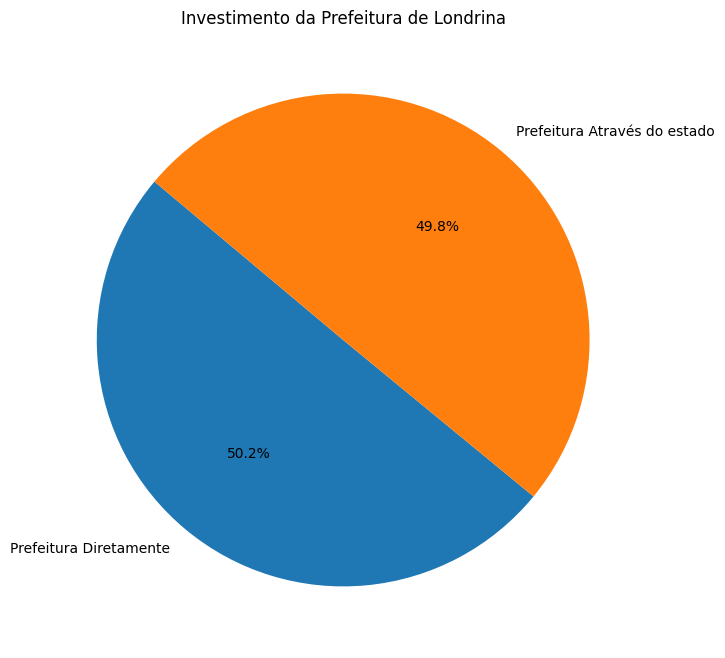

In [7]:
import matplotlib.pyplot as plt

# Dados
labels = ['Prefeitura Diretamente', 'Prefeitura Através do estado']
valores = [50.16, 49.84]  # Porcentagens

# Cores para as fatias
cores = ['#1f77b4', '#ff7f0e']

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=labels, autopct='%1.1f%%', colors=cores, startangle=140)

# Adicionando título
plt.title('Investimento da Prefeitura de Londrina')

# Save
plt.savefig('maiores_pagamentos.png', bbox_inches='tight')

# Exibindo o gráfico
plt.show()